In [1]:
# Needed libraries:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [11]:
# Loading and analyzing the dataset.:

# Placeholder for dataset URL or file path
# Replace the following with the actual dataset URL or local file path

# Example of using a direct URL
# test_dataset = "https://www.kaggle.com/datasets/piyushkr101200/nn-assign1-2ddata?resource=download"

# Example of using a local file path
# test_dataset = "data//data.csv"

file_path = "ENTER\\THE\\PATH\]\FOR\\THE\\DATASET.CSV"
test_dataset = pd.read_csv(file_path)

test_dataset.head(9)
test_dataset.tail(9)
# test_dataset.describe()
#test_dataset.dtypes


,0.29166,0.83188,1
90,0.40171,-0.113420,1
91,0.92458,-0.066475,1
92,0.50104,-0.970660,0
93,0.47999,0.328100,1
94,-0.13625,0.448120,1
95,0.26853,-0.436730,0
96,0.60605,-0.476360,1
97,-0.83224,0.416940,0
98,0.89093,0.567720,1


In [14]:
# Data selection: Here, we select the features and assign it to X as a numpy array. Next, we assign the target value we want to predict to Y as a numpy array as well. 

features_df = test_dataset[['0.29166', '0.83188']]
X = np.array(features_df)

Y = np.array(test_dataset[['1']])
Y[0:5] # <----------- This last line simply show the first 5 rows of data of the numpy array Y.

array([[1],
       [0],
       [1],
       [0],
       [0]])

In [34]:
# Train/Test split:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

# The ravel() function is needed to convert the 2D numpy array for the Y target arrays into 1D which is required. This is NOT required for the feature arrays so they can remain at 2D.
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

print("Train set: ", X_train.shape, Y_train.shape)
print("Test set: ", X_test.shape, Y_test.shape)

Train set:  (79, 2) (79,)
Test set:  (20, 2) (20,)


In [33]:
# SVM Modeling with Sckit-learn

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)

# Now that the model is fitted, it can be used to predict new values.:

yhat = clf.predict(X_test)
yhat[0:5]

array([1, 1, 0, 0, 0])

In [41]:
# Evaluating the model.:

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print(f1_score(Y_test, yhat, average='weighted'))
print(jaccard_score(Y_test, yhat, pos_label=1))

0.9503836317135551
0.8888888888888888


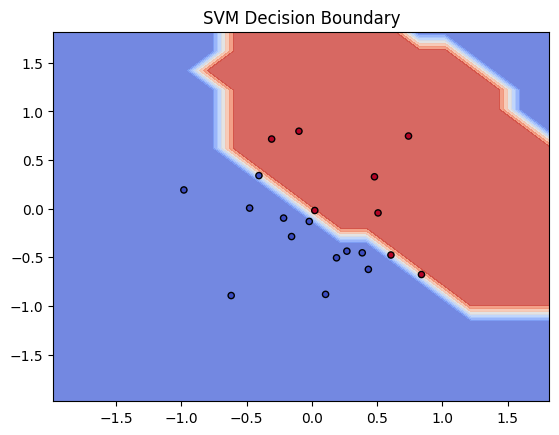

In [43]:
# Plotting the SVM with matplotlib

def custom_plot(X, Y, model):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM Decision Boundary')
    plt.show()

# Call the plot function
custom_plot(X_test, Y_test, clf)